In [2]:
import numpy as np
from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt, PIDController, Tsit5
from scipy.integrate import odeint, solve_ivp
import diffrax
import importlib
import core

importlib.reload(core)


<module 'core' from '/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py'>

In [7]:
import core
db_csv_path = "dataset/data.csv"
idata_save_path = "odes-exp04-idata-4-number-1core-c0number-halfnormks-from-core.py-success.dt"

dataset_ori = core.MyDataset(db_csv_path)
df_ori = dataset_ori.get_df()
cct_names, error_names = dataset_ori.get_var_col_names()
c0 = df_ori[cct_names].iloc[0].values

# 假设都是一级动力学
k_kinetics = np.repeat(1, 11).astype(np.uint8) 
# k_kinetics = np.array([0,0,0,0,1,1,0,0,1,1,0]).astype(np.uint8) 
ks = np.array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299, 0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432, 0.00177611])
#  =======================================================

# t_eval = np.linspace(0.5, 150, 8)
t_eval = np.array([0.5, 48, 96, 144])


dataset = core.MyDataset(db_csv_path)
df = dataset.get_df()
cct_names, error_names = dataset.get_var_col_names()
c0 = df[cct_names].iloc[0].values
dataset.set_as_sim_dataset(t_eval, c0, args=(ks, k_kinetics))
df = dataset.get_df()
y = odeint(core.get_dcdts(c_first=True), y0=c0, t=t_eval, args=(ks, k_kinetics))
y_s = solve_ivp(core.get_dcdts(), t_span=(0.5, 144), y0=c0, t_eval=t_eval, args=(ks, k_kinetics))

print((y_s.y.transpose(1,0) - y).sum())

0.002594266848719322


In [ ]:
# term = ODETerm(core.get_dcdts(c_first=True))
# solver = Dopri5()
# saveat = SaveAt(ts=t_eval)
# stepsize_controller = PIDController(rtol=1e-5, atol=1e-5)
# solver = diffrax.Heun()
# sol = diffeqsolve(term, solver, t0=t_eval[0], t1=t_eval[-1], dt0=0.1, y0=list(c0), saveat=saveat, args=[ks.tolist(), k_kinetics.tolist()], stepsize_controller=stepsize_controller)

# print(sol.ts)  # DeviceArray([0.   , 1.   , 2.   , 3.    ])
# y2 = np.array(sol.ys).transpose(1,0)

# print( np.sum(y2- y))

In [9]:
import time
n = 1000

s_time = time.time()
ks = np.random.random(11)/100
for x in range(n):
    ks = np.random.random(11)/100
    # sol = diffeqsolve(term, diffrax.Tsit5(), t0=t_eval[0], t1=t_eval[-1], dt0=48, y0=list(c0), saveat=saveat, args=[ks.tolist(), k_kinetics.tolist()])
    y_s = solve_ivp(core.get_dcdts(),t_span=(0.5, 144), y0=c0, t_eval=t_eval, args=(ks, k_kinetics), method='RK45')

s_time1 = time.time()
print(s_time1-s_time)
for x in range(n):
    ks = np.random.random(11)/100
    y = odeint(core.get_dcdts(c_first=True), y0=c0, t=t_eval, args=(ks, k_kinetics))

e_time = time.time()
print(s_time1-s_time, e_time-s_time1)

1.9270849227905273


/opt/homebrew/Caskroom/mambaforge/base/envs/pymc4/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5966392904590D+02   r2 =  0.2147348390812D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5966392904590D+02   r2 =  0.2147348390812D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5966392904590D+02   r2 =  0.3247994198127D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5966392904590D+02   r2 =  0.8119985495318D-15
 lsoda--  warning..internal t (=r1) 

In [10]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, SaveAt, Tsit5


def vector_field(t, y, args):
    prey, predator = y
    α, β, γ, δ = args
    d_prey = α * prey - β * prey * predator
    d_predator = -γ * predator + δ * prey * predator
    d_y = d_prey, d_predator
    return d_y

ly_term = ODETerm(vector_field)
solver = Tsit5()
t0 = 0
t1 = 140
dt0 = 0.1
y0 = (10.0, 10.0)
args = (0.1, 0.02, 0.4, 0.03)
saveat = SaveAt(ts=jnp.linspace(t0, t1, 1000))
sol = diffeqsolve(ly_term, solver, t0, t1, dt0, y0, args=args, saveat=saveat)

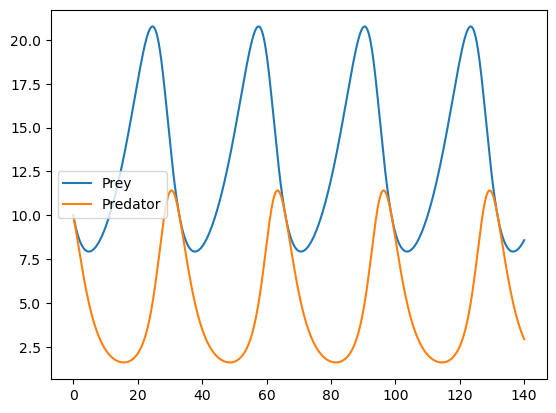

In [11]:
plt.plot(sol.ts, sol.ys[0], label="Prey")
plt.plot(sol.ts, sol.ys[1], label="Predator")
plt.legend()
plt.show()
